In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import snowball
import pickle
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

# plt.rcParams['figure.figsize'] = (15, 9)

In [2]:
out = pd.read_pickle("outputs_cleaned.pickle")

In [3]:
# Discard single authored papers -- no useful colaboration input
out = out[out["AUTHORS"].apply(lambda x: len(x)) > 1]

In [4]:
out

,TITLE,TYPE,PUBLICATION_YEAR,KEYWORDS,ABSTRACT,AUTHORS
53490655,communication as information use,"(book, chapter)",2011,NaN,introduction uncertainty is an unavoidable pro...,"[1968, 12503]"
56453104,tobacco,"(book, chapter)",2013,NaN,NaN,"[27487, 22878]"
91245910,electro induced orientational ordering of anis...,"(book, chapter)",2013,anisotropic pigment nanoparticles colloids e...,the response of anisotropic pigment particle s...,"[2472, 442]"
52102572,data utilization in flood inundation modelling,"(book, chapter)",2010,data requirements for flood inundation modelli...,NaN,"[28147, 8925]"
51699744,exploring nuclear motion through conical inter...,"(book, chapter)",2011,NaN,the concept of adiabatic electronic potential ...,"[94, 34765]"
51699782,high resolution photofragment translational sp...,"(book, chapter)",2011,NaN,photofragment translational spectroscopy pts ...,"[34765, 94]"
52201104,historical archaeological and ethnographic pe...,"(book, chapter)",2012,NaN,NaN,"[9668, 14842]"
89560817,extracellular matrix and smooth muscle cells,"(book, chapter)",2012,NaN,the arterial wall is a highly organised struct...,"[10684, 11532]"
91245400,the influence of suspended nano particles on t...,"(book, chapter)",2013,barium titanate frederiks transition liquid ...,in recent years several papers reported an enh...,"[18457, 2472]"
34840104,seismic behavior of thin bed layered unreinfor...,"(book, chapter)",2013,NaN,NaN,"[2824, 18338]"


In [5]:
stemmer = snowball.SnowballStemmer("english", ignore_stopwords=False)
def tokenise(s):
    if isinstance(s, str):
        global stemmer
        # split
        o = s.split()
        o = [i.strip() for i in o]
        # stopwords
        o = [w for w in o if w not in stopwords.words('english')]
        # stemmer
        o = [stemmer.stem(w) for w in o]
        return o
    else:
        return s

In [6]:
out["t"] = out["TITLE"].apply(tokenise)
print "t"
out["a"] = out["ABSTRACT"].apply(tokenise)
print "a"
out["k"] = out["KEYWORDS"].apply(tokenise)
print "k"

t
a
k


In [7]:
with open("./schls_ppl.pickle", "r") as sp:
    school_ppl = pickle.load(sp)

In [8]:
def ppl2school(ppl):
    global school_ppl
    schools = []
    for p in ppl:
        for school in school_ppl:
            if p in school_ppl[school]:
                if school not in schools:
                    schools.append(school)
    return schools

out["schools"] = out["AUTHORS"].apply(ppl2school)

In [9]:
# zeor schools?
out = out[out["schools"].apply(lambda x: len(x)) > 0]

In [10]:
# papers per school
paper_per_school = {}
for i in out["schools"]:
    for s in i:
        if s in paper_per_school:
            paper_per_school[s] += 1
        else:
            paper_per_school[s] = 1

print np.mean(paper_per_school.values())
print np.median(paper_per_school.values())
paper_per_school

337.305555556
143.5


{'BIOC': 295,
 'BISC': 333,
 'CABI': 1,
 'CHEM': 785,
 'CHSE': 49,
 'EDUC': 233,
 'EFIM': 56,
 'ENGF': 85,
 'GELY': 363,
 'GEOG': 435,
 'GSEN': 11,
 'HUMS': 50,
 'INOV': 5,
 'LANG': 1,
 'LAWD': 41,
 'MATH': 168,
 'MDYF': 112,
 'MEED': 119,
 'MODL': 17,
 'MSAD': 26,
 'MVEN': 1076,
 'MVSF': 60,
 'NSQI': 3,
 'ORDS': 340,
 'PANM': 268,
 'PHPH': 455,
 'PHYS': 796,
 'PSYC': 291,
 'QUEN': 1156,
 'SART': 68,
 'SCIF': 3,
 'SOCS': 1548,
 'SPAI': 44,
 'SPOL': 311,
 'SSCM': 1980,
 'VESC': 559}

(array([ 19.,   8.,   3.,   1.,   1.,   2.,   0.,   1.,   0.,   1.]),
 array([  1.00000000e+00,   1.98900000e+02,   3.96800000e+02,
          5.94700000e+02,   7.92600000e+02,   9.90500000e+02,
          1.18840000e+03,   1.38630000e+03,   1.58420000e+03,
          1.78210000e+03,   1.98000000e+03]),
 <a list of 10 Patch objects>)

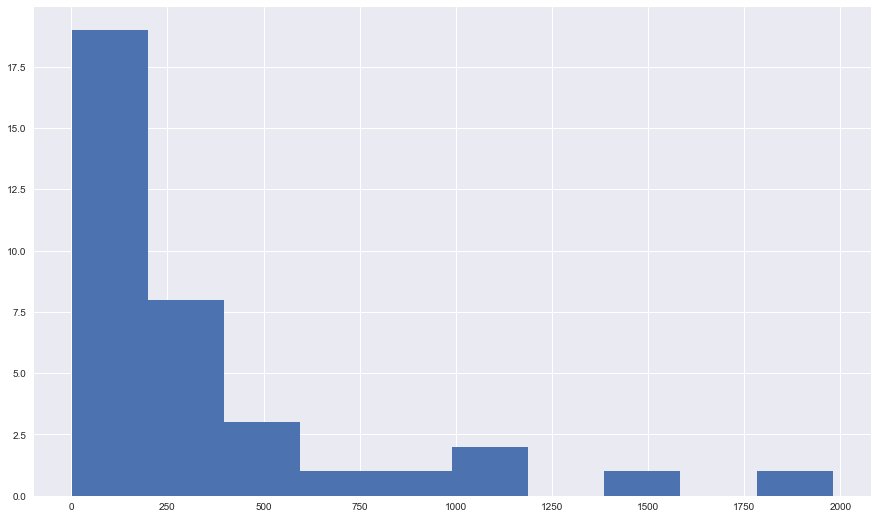

In [11]:
# sns.distplot(paper_per_school.values(), label=paper_per_school.keys())
# plt.hist(paper_per_school.values(), label=paper_per_school.keys())

# tf-idf

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

id_title = []
for i in out["TITLE"].index:
    id_title.append((i, out["TITLE"][i]))

In [13]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,3), min_df = 0, stop_words = 'english')
tfidf_matrix =  tf.fit_transform([title for id, title in id_title])

In [14]:
from sklearn.metrics.pairwise import linear_kernel
 
def find_similar(tfidf_matrix, index, top_n = 5):
    cosine_similarities = linear_kernel(tfidf_matrix[index:index+1], tfidf_matrix).flatten()
    related_docs_indices = [i for i in cosine_similarities.argsort()[::-1] if i != index]
    return [(index, cosine_similarities[index]) for index in related_docs_indices][0:top_n]

In [15]:
pid = 5
print out.loc[id_title[pid][0]]["schools"], id_title[pid]

['CHEM'] (51699782, 'high resolution photofragment translational spectroscopy using rydberg tagging methods')


In [16]:
for index, score in find_similar(tfidf_matrix, pid, top_n=400):
    if out.loc[id_title[index][0]]["schools"] != out.loc[id_title[pid][0]]["schools"]:
        print score, out.loc[id_title[index][0]]["schools"],  id_title[index]
        break

0.095130505762 ['BIOC', 'MVSF', 'PHPH'] (2724503, 'intracellular membrane traffic at high resolution')


In [20]:
connections = []
def not9n2(l1, l2):
    for i in l1:
        if i in l2:
            return False
    return True
for pid in range(len(id_title)):
    org = out.loc[id_title[pid][0]]["schools"], id_title[pid]
    
    sims = []
    for index, score in find_similar(tfidf_matrix, pid, top_n=400):
        if not9n2(out.loc[id_title[index][0]]["schools"], out.loc[id_title[pid][0]]["schools"]):# and \
#             score > 0.25 and score < 0.5:
            sims.append((score, out.loc[id_title[index][0]]["schools"],  id_title[index]))
    
    if len(sims) > 0:
#         print "+++++"
        for i in sims:
#             print i
            connections.append([org[0], i[0], i[1]])
#             print org[0], "---", i[0], "---", i[1]
#         print "--------------------------------------------------------------------"

KeyboardInterrupt: 

In [21]:
connections

[[['MDYF', 'SOCS'], 0.47436556965718879, ['SSCM']],
 [['GELY', 'SSCM'], 0.26401949947819792, ['GEOG']],
 [['MATH', 'GELY'], 0.30808257601391092, ['GEOG']],
 [['MATH', 'GELY'], 0.28999474051612795, ['ENGF', 'SSCM']],
 [['ENGF', 'SSCM'], 0.28999474051612795, ['MATH', 'GELY']],
 [['ENGF', 'SSCM'], 0.25078963994634501, ['GELY', 'MATH']]]

In [22]:
with open("tfidf.pkl", "w") as pl:
    pickle.dump(connections, pl)

In [24]:
with open("tfidf_.pkl", "r") as pl:
    cc = pickle.load(pl)

In [26]:
len(cc)

144

In [27]:
cc

[[['MDYF', 'SOCS'], 0.51066658533794551, ['SSCM']],
 [['MDYF', 'SOCS'], 0.47436556965718879, ['SSCM']],
 [['GELY', 'SSCM'], 0.26401949947819792, ['GEOG']],
 [['MATH', 'GELY'], 0.30808257601391092, ['GEOG']],
 [['MATH', 'GELY'], 0.28999474051612795, ['ENGF', 'SSCM']],
 [['ENGF', 'SSCM'], 0.28999474051612795, ['MATH', 'GELY']],
 [['ENGF', 'SSCM'], 0.25078963994634501, ['GELY', 'MATH']],
 [['GELY'], 0.25935072249785041, ['SSCM']],
 [['GEOG'], 0.30808257601391092, ['MATH', 'GELY']],
 [['GEOG'], 0.26643213657860876, ['GELY', 'MATH']],
 [['GEOG'], 0.26401949947819792, ['GELY', 'SSCM']],
 [['SPOL'], 0.31473389318989248, ['SSCM']],
 [['PHPH'], 0.32567012921855487, ['BIOC']],
 [['BISC'], 0.33458524728042183, ['QUEN']],
 [['MVEN'], 0.27124683020238755, ['QUEN']],
 [['MVEN'], 0.27124683020238755, ['QUEN']],
 [['PSYC'], 0.25442454696538919, ['SSCM']],
 [['QUEN'], 0.27124683020238755, ['MVEN']],
 [['SSCM'], 0.35858748188496725, ['SOCS']],
 [['SSCM'], 0.26755208529610586, ['SOCS']],
 [['MVEN'], 0.27

In [30]:
poss = {}
for o1, v, o2 in cc:
    for i in o1:
        for j in o2:
            n1 = i+","+j
            n2 = j+","+i
            ov1 = poss.get(n1, 0)
            ov2 = poss.get(n2, 0)
            if ov1 != ov2:
                print "error"
            poss[n1] = ov1+v
            poss[n2] = ov1+v

In [37]:
x = zip(poss.values(), poss.keys())
sorted(x)

[(0.51621932958227645, 'EFIM,SOCS'),
 (0.51621932958227645, 'MEED,SOCS'),
 (0.51621932958227645, 'SOCS,EFIM'),
 (0.51621932958227645, 'SOCS,MEED'),
 (0.52287493132240326, 'BISC,PSYC'),
 (0.52287493132240326, 'PHPH,PSYC'),
 (0.52287493132240326, 'PHYS,PSYC'),
 (0.52287493132240326, 'PSYC,BISC'),
 (0.52287493132240326, 'PSYC,PHPH'),
 (0.52287493132240326, 'PSYC,PHYS'),
 (0.52370554355532017, 'CABI,SOCS'),
 (0.52370554355532017, 'SOCS,CABI'),
 (0.52803899895639583, 'GEOG,SSCM'),
 (0.52803899895639583, 'SSCM,GEOG'),
 (0.5394896942386731, 'QUEN,SPOL'),
 (0.5394896942386731, 'SPOL,QUEN'),
 (0.5440077822221604, 'ORDS,PANM'),
 (0.5440077822221604, 'ORDS,SOCS'),
 (0.5440077822221604, 'PANM,ORDS'),
 (0.5440077822221604, 'SOCS,ORDS'),
 (0.57458270349690044, 'BIOC,MATH'),
 (0.57458270349690044, 'BIOC,SART'),
 (0.57458270349690044, 'MATH,BIOC'),
 (0.57458270349690044, 'SART,BIOC'),
 (0.58988546265069586, 'BIOC,CHSE'),
 (0.58988546265069586, 'BIOC,SSCM'),
 (0.58988546265069586, 'CHSE,BIOC'),
 (0.589

In [40]:
s = "org1,org2,total\n"
for i in poss:
    v = "%.10f" % poss[i]
    s += i+","+v+"\n"

In [43]:
with open("possible_collaborations.csv", "w") as pc:
    pc.write(s)